In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [82]:
test=pd.read_csv("D:/DATA/test.csv")
train=pd.read_csv("D:/DATA/train.csv")

In [83]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [85]:
train.shape

(1460, 81)

In [86]:
test.shape

(1459, 80)

In [87]:
df_numerics = train.select_dtypes(include=np.number)
df_numerics

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [88]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [89]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)

In [90]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

No handles with labels found to put in legend.


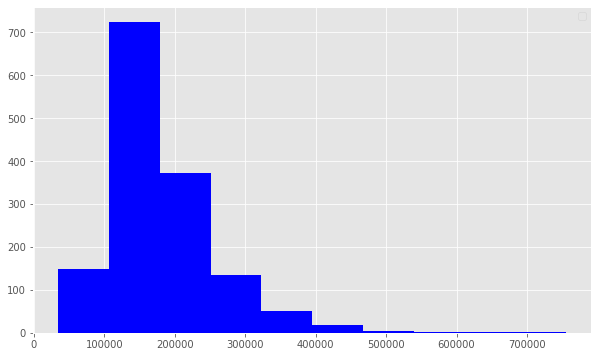

Skew is : 1.8828757597682129


In [91]:
plt.hist(train.SalePrice, color='blue')
plt.legend()
plt.show()
print("Skew is :",train.SalePrice.skew())

new skew: 0.12133506220520406


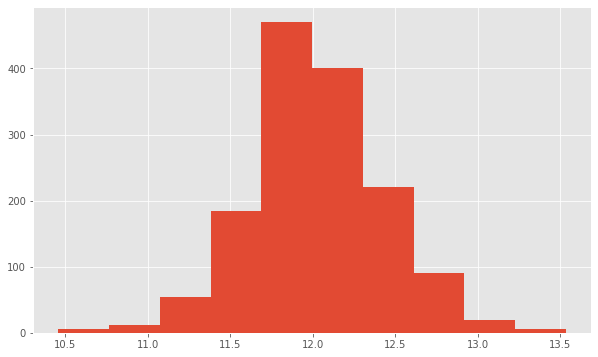

In [92]:
#removing skewness
new=np.log(train.SalePrice)
print ("new skew:",new.skew())
plt.hist(new)
plt.show()

In [93]:
corr=df_numerics.corr()

In [94]:
corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [95]:
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


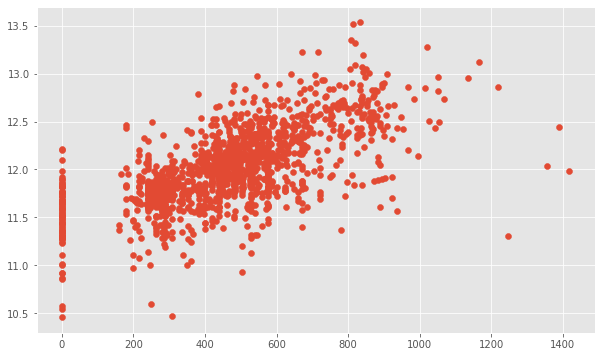

In [96]:
#outliers are following after 1200
plt.scatter(x=train['GarageArea'],y=new)

In [97]:
#removing outliers
train= train[train["GarageArea"]<1200]

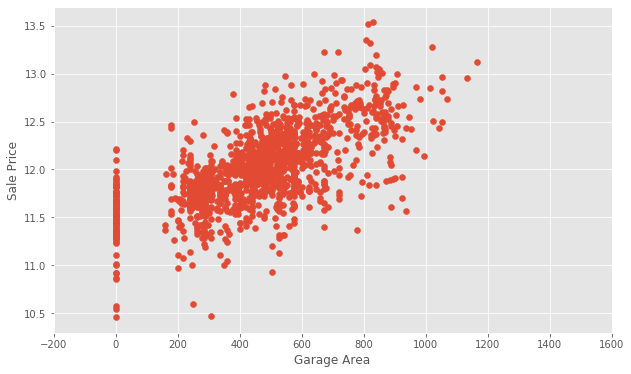

In [98]:
#outliers are following after 1200
plt.scatter(x=train['GarageArea'],y=np.log(train.SalePrice))
plt.xlim(-200,1600) #to plot into same size
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")
plt.show()

In [99]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:20])
null.columns=['Null Count']
null.index.name='Feature'
null

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [100]:
df_cata=train.select_dtypes(exclude=[np.number])
df_cata.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [101]:
#one-hot coding process start
print("original")
train.Street.value_counts()

original


Pave    1450
Grvl       5
Name: Street, dtype: int64

In [102]:
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)
test['enc_street']=pd.get_dummies(test.Street, drop_first=True)

D:\softwares\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
#one hot coding result
print("Encoded")
train.enc_street.value_counts()

Encoded


1    1450
0       5
Name: enc_street, dtype: int64

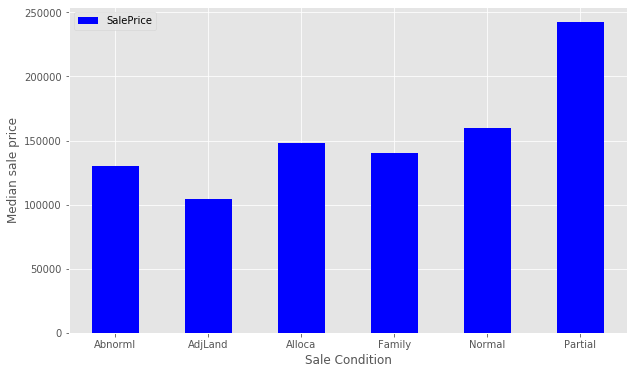

In [104]:
# piviot table with frequency bar graph
condition_pivot=train.pivot_table(index='SaleCondition',values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel("Sale Condition")
plt.ylabel("Median sale price")
plt.xticks(rotation=0)
plt.show()

In [105]:
#one hot coding another method
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition']=train.SaleCondition.apply(encode)
test['enc_condition']=test.SaleCondition.apply(encode)

D:\softwares\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


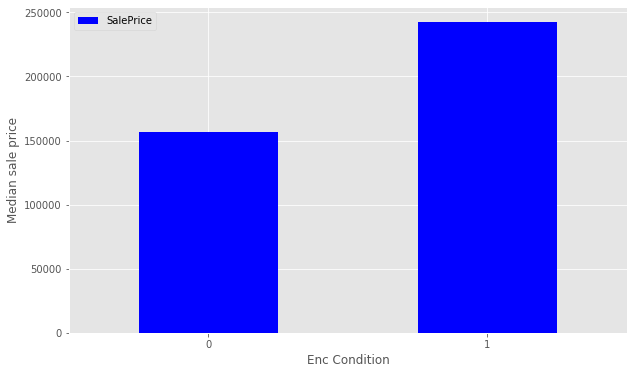

In [106]:
condition_pivot=train.pivot_table(index='enc_condition',values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel("Enc Condition")
plt.ylabel("Median sale price")
plt.xticks(rotation=0)
plt.show()

In [107]:
# checking null values in dataframe
sum(train.isnull().sum()!=0)

19

In [108]:
#null value removal interpolate use to fill all missing values with its sixth sense hahah
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [109]:
print(sum(data.isnull().sum()!=0))

0


In [110]:
y=np.log(train.SalePrice)
x=data.drop(['SalePrice','Id'],axis=1)

In [111]:
# splitting the values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.33)


In [112]:
lr=linear_model.LinearRegression()

In [113]:
model=lr.fit(x_train, y_train)

In [114]:
# now we have to find r^2 value and helps in measuring
#how close is our data is fitted to regression line 
# it takes value between 0 to 1
# now i am going to see my r square value on the basis of test
print("R squared is :",model.score(x_test,y_test))

R squared is : 0.8608910324569929


In [115]:
# Now i am going to consider root mean square error (RMSE)
#RMSE is use to calculate the distance between the predicted values and actual values
predictions=model.predict(x_test)
print("RMSE:",mean_squared_error(y_test,predictions))

RMSE: 0.022765905886336042


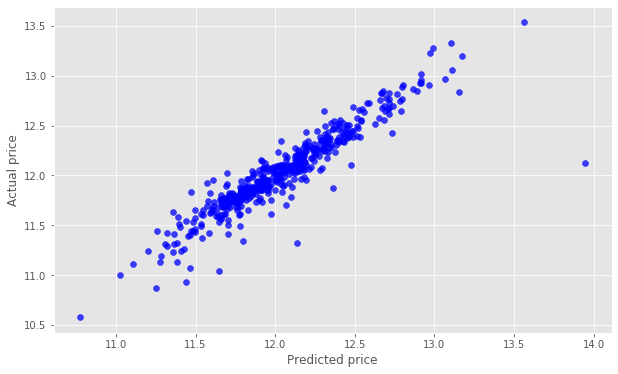

In [117]:
#gragh of RMSE of predicted values and actual values 
actual_values=y_test
plt.scatter(predictions,actual_values,alpha=.75,color='b') #alpha helps in showing overlapping data
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title =("Linear Regression model")
plt.show()

In [118]:
#improving the model
#ridge regularisation to decrease the influences of less important features
#linear_model.Ridge()
# It didnt help the model to improve I am not going to use it

In [119]:
submission=pd.DataFrame()
submission['Id']=test.Id

In [122]:
feats=test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

In [123]:
feats

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,120,0,0,6,2010,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,36,0,0,0,0,12500,6,2010,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,34,0,0,0,0,0,3,2010,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,36,0,0,0,0,0,6,2010,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,82,0,0,144,0,0,1,2010,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,6,2006,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,24,0,0,0,0,0,4,2006,1,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,0,0,9,2006,1,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,32,0,0,0,0,700,7,2006,1,0


In [125]:
predictions=model.predict(feats)

In [128]:
predictions[:10]

array([11.73869195, 11.70829419, 12.06696923, 12.17714524, 12.08430517,
       12.03800441, 12.14008374, 11.9844779 , 12.17617277, 11.67001656])

In [127]:
#as we did log to remove the outliers and we have to exponential to revert it back
final_predictions=np.exp(predictions)

In [129]:
final_predictions[:10]

array([125328.29766432, 121575.91808547, 174027.6078097 , 194297.39762822,
       177070.84137492, 169059.2312346 , 187228.25035212, 160248.00062355,
       194108.54034699, 117010.21995624])

In [130]:
submission['SalePrice']=final_predictions

In [131]:
submission.head()

,Id,SalePrice
0,1461,125328.297664
1,1462,121575.918085
2,1463,174027.607810
3,1464,194297.397628
4,1465,177070.841375


In [132]:
submission.to_csv('submission.csv', index=False)